In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [49]:
dataset = "Herring"
f = np.loadtxt(f"Smoothed/{dataset}_smoothed.csv", delimiter=",")
np.random.seed(0)
#np.random.shuffle(f)
ts = f[:, 2:]
labels = f[:, 0].astype(int)
train = f[:, 1].astype(bool)

In [18]:
def walker(ts, m):
    X = np.zeros_like(ts)
    col = ts.shape[0]
    N = ts.shape[1]
    
    for i in range(0,col):
        w = X[i, :]
        y = ts[i, :]
        
        w[0] = y[0]
        w[1] = y[1]
        for k in range(2, N):
            w_inert = w[k-1] * 2 - w[k-2]
            w[k] = w_inert + (y[k] - w_inert)/m
        
        X[i, :] = w
    
    return X

z:\Github\hctsa\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
z:\Github\hctsa\.venv\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


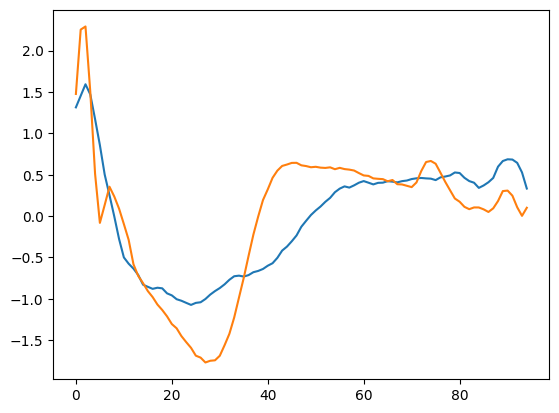

In [40]:
plt.clf()
#axes = plt.subplot(3, 1, 1)
plt.plot(np.mean(ts[labels==1], axis=0))
plt.plot(np.mean(ts[labels==2], axis=0))
plt.plot(np.mean(ts[labels==3], axis=0))

<Figure size 640x480 with 0 Axes>

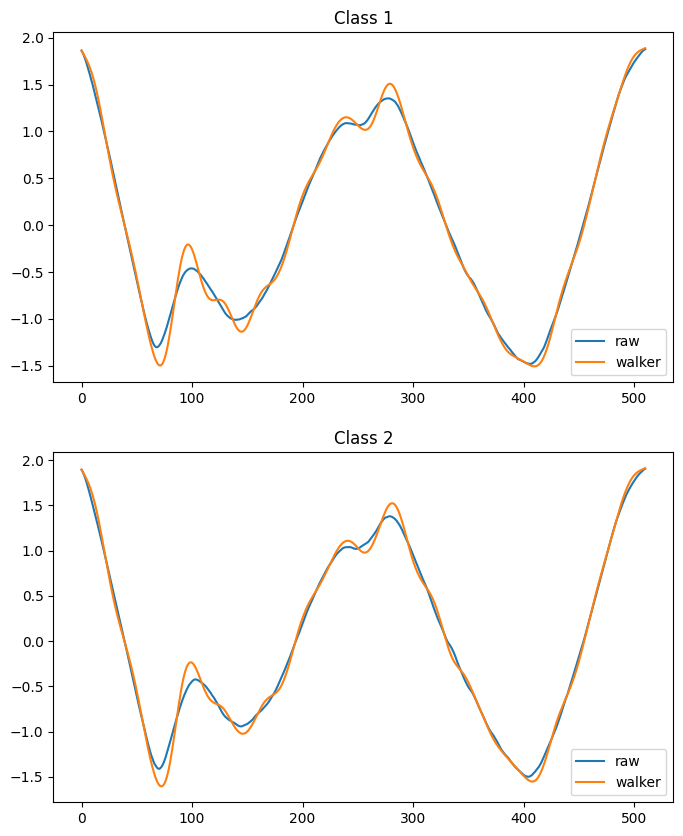

In [53]:
plt.clf()
m = 30

plt.figure(figsize=(8, 10))
#plt.title("StarLightCurves classes")

for i in range(0, np.max(labels)):
    ax = plt.subplot(np.max(labels), 1, i + 1)
    ax.plot(np.mean(ts[labels==i+1], axis = 0), label = "raw")
    ax.plot(np.mean(walker(ts[labels==i+1], m), axis = 0), label = "walker")
    plt.title(f"Class {i+1}")
    ax.legend()
